## 국민연금 데이터를 활용한 연봉 추정 및 퇴직자수 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight") 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

## EDA(탐색적 데이터 분석)

### 데이터 불러오기

In [2]:
df1 = pd.read_csv('국민연금 가입 사업장 내역 1월.csv',encoding='cp949')
df2 = pd.read_csv('국민연금 가입 사업장 내역 2월.csv',encoding='cp949')
df3 = pd.read_csv('국민연금 가입 사업장 내역 3월.csv',encoding='cp949')
df4 = pd.read_csv('국민연금 가입 사업장 내역 4월.csv',encoding='cp949')
df5 = pd.read_csv('국민연금 가입 사업장 내역 5월.csv',encoding='cp949')
df6 = pd.read_csv('국민연금 가입 사업장 내역 6월.csv',encoding='cp949')
df7 = pd.read_csv('국민연금 가입 사업장 내역 7월.csv',encoding='cp949')
df8 = pd.read_csv('국민연금 가입 사업장 내역 8월.csv',encoding='cp949')
df9 = pd.read_csv('국민연금 가입 사업장 내역 9월.csv',encoding='cp949')
df10 = pd.read_csv('국민연금 가입 사업장 내역 10월.csv',encoding='cp949')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=0)

### 전체적인 데이터 살펴보기

In [4]:
df.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,Jan-22,(주)니프코코리아,211814,1,31409,충청남도 아산시 둔포면,충청남도 아산시 둔포면 아산밸리남로,4420036032,4420036032,44,...,1,252901,포장용 플라스틱 성형용기 제조업,1988-01-01,NaN,NaN,597,268966860,1,6
1,Jan-22,글로웨이 주식회사,110812,1,6072,서울특별시 강남구 청담동,서울특별시 강남구 영동대로137길,1168010400,1168056500,11,...,1,452101,미장 타일 및 방수 공사업,1988-01-01,NaN,NaN,3,1265560,0,0
2,Jan-22,신일기업(주),201810,1,4537,서울특별시 중구 충무로2가,서울특별시 중구 퇴계로,1114012500,1114055000,11,...,1,381002,NaN,1988-01-01,NaN,NaN,18,5879100,0,0
3,Jan-22,디에스디엘(주),104811,1,4526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,17,4330100,0,0
4,Jan-22,(주)헤럴드,104810,1,4336,서울특별시 용산구 후암동,서울특별시 용산구 후암로4길,1117010100,1117051000,11,...,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,NaN,NaN,314,119581820,4,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449333 entries, 0 to 546813
Data columns (total 22 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   자료생성년월                object
 1    사업장명                 object
 2    사업자등록번호              int64 
 3    사업장가입상태코드 1 등록 2 탈퇴  int64 
 4    우편번호                 object
 5    사업장지번상세주소            object
 6    사업장도로명상세주소           object
 7    고객법정동주소코드            int64 
 8    고객행정동주소코드            object
 9    법정동주소광역시도코드          int64 
 10   법정동주소광역시시군구코드        int64 
 11   법정동주소광역시시군구읍면동코드     int64 
 12   사업장형태구분코드 1 법인 2 개인  int64 
 13   사업장업종코드              object
 14   사업장업종코드명             object
 15   적용일자                 object
 16   재등록일자                object
 17   탈퇴일자                 object
 18   가입자수                 int64 
 19   당월고지금액               int64 
 20   신규취득자수               int64 
 21   상실가입자수               int64 
dtypes: int64(11), object(11)
memory usage: 956.2+ MB


In [6]:
df[' 사업자등록번호'] = df[' 사업자등록번호'].astype(object) #데이터 타입 변환
df[' 사업장가입상태코드 1 등록 2 탈퇴'] = df[' 사업장가입상태코드 1 등록 2 탈퇴'].astype(object)
df[' 고객법정동주소코드'] = df[' 고객법정동주소코드'].astype(object)
df[' 법정동주소광역시도코드'] = df[' 법정동주소광역시도코드'].astype(object)
df[' 법정동주소광역시시군구코드'] = df[' 법정동주소광역시시군구코드'].astype(object)
df[' 법정동주소광역시시군구읍면동코드'] = df[' 법정동주소광역시시군구읍면동코드'].astype(object)
df[' 사업장형태구분코드 1 법인 2 개인'] = df[' 사업장형태구분코드 1 법인 2 개인'].astype(object)

In [7]:
df[df.duplicated(keep=False)] # 중복된 행 출력
df = df.drop_duplicates() # 중복된 행 제거
df.shape

(5449323, 22)

In [8]:
df.isnull().sum() #결측치 개수

자료생성년월                        0
 사업장명                         0
 사업자등록번호                      0
 사업장가입상태코드 1 등록 2 탈퇴          0
 우편번호                         0
 사업장지번상세주소                    0
 사업장도로명상세주소                   0
 고객법정동주소코드                    0
 고객행정동주소코드                    0
 법정동주소광역시도코드                  0
 법정동주소광역시시군구코드                0
 법정동주소광역시시군구읍면동코드             0
 사업장형태구분코드 1 법인 2 개인          0
 사업장업종코드                      0
 사업장업종코드명                 93765
 적용일자                         0
 재등록일자                  5317246
 탈퇴일자                   5187351
 가입자수                         0
 당월고지금액                       0
 신규취득자수                       0
 상실가입자수                       0
dtype: int64

### 이상치 분석

In [9]:
df.describe() #수치형 데이터 통계값

,가입자수,당월고지금액,신규취득자수,상실가입자수
count,5449323.00,5449323.00,5449323.00,5449323.00
mean,19.32,5864079.63,0.90,0.71
std,257.31,110514952.90,11.35,10.62
min,0.00,0.00,0.00,0.00
25%,4.00,858140.00,0.00,0.00
50%,6.00,1516020.00,0.00,0.00
75%,12.00,3138640.00,1.00,0.00
max,117613.00,57232874680.00,16461.00,16587.00


In [10]:
df.describe(include='O') #범주형 데이터 통계값

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자
count,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5449323,5355558,5449323,132077,261972
unique,10,818281,8962,2,43080,5056,85153,17724,20979,18,105,123,1,2918,1338,11428,3804,1561
top,Aug-22,오하운폴댄스학원,114812,1,48059,서울특별시 금천구 가산동,,1154510100,1154551000,41,200,101,1,999999,BIZ_NO미존재사업장,1988-01-01,2022-01-01,2022-01-01
freq,549857,300,8184,5187340,7724,69846,248812,69846,59273,1441003,279664,411887,5449323,523619,726458,104834,1693,27346


### 속성 간의 관계 분석

<AxesSubplot:>

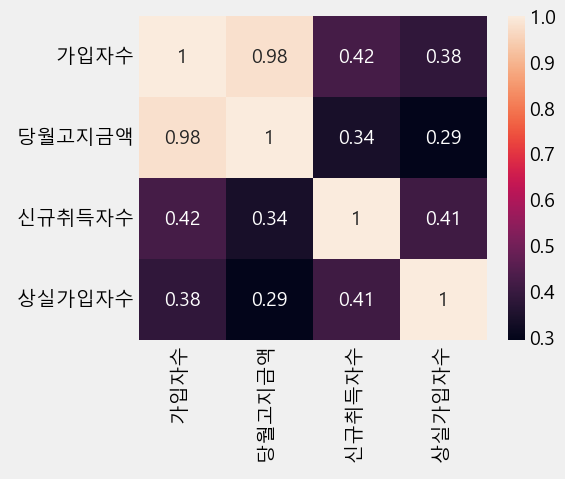

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)

## 데이터 전처리

In [12]:
df.columns

Index(['자료생성년월', ' 사업장명', ' 사업자등록번호', ' 사업장가입상태코드 1 등록 2 탈퇴', ' 우편번호',
       ' 사업장지번상세주소', ' 사업장도로명상세주소', ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드',
       ' 법정동주소광역시시군구코드', ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1 법인 2 개인',
       ' 사업장업종코드', ' 사업장업종코드명', ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수', ' 당월고지금액',
       ' 신규취득자수', ' 상실가입자수'],
      dtype='object')

In [13]:
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실'] #컬럼명 변경

In [14]:
len(df.columns)

22

In [15]:
len(columns)

22

In [16]:
df.columns = columns

In [17]:
df = df.drop(columns=['우편번호', '지번주소', '법정주소코드', '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', 
                      '사업장형태', '업종코드', '적용일', '재등록일', '탈퇴일']) #불필요한 컬럼 드랍

In [18]:
df['자료생성년월'].value_counts()

Aug-22     549857
2022-07    548441
Jan-22     547708
Sep-22     546959
Oct-22     546812
2022-06    545720
2022-05    544120
2022-02    543183
2022-04    542537
2022-03    533986
Name: 자료생성년월, dtype: int64

In [19]:
df['자료생성년월'] = df['자료생성년월'].replace(['Jan-22','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07',
                      'Aug-22','Sep-22','Oct-22'],[1,2,3,4,5,6,7,8,9,10]) #자료생성년월 변경

In [20]:
df = df.loc[df['가입상태'] != 2] #가입상태가 1인 데이터만 추출
df = df.loc[df['고지금액'] != 0] #고지금액이 있는 데이터만 추출(고지금액으로 연봉 추정을 하기 위함)

In [21]:
df = df.drop(columns = '가입상태') #가입상태 컬럼 드랍

In [22]:
df['업종코드명'] = df['업종코드명'].fillna('기타') #업종코드명에 결측치가 존재하는 경우는 '기타'로 대체
df.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6
1,1,글로웨이 주식회사,110812,서울특별시 강남구 영동대로137길,미장 타일 및 방수 공사업,3,1265560,0,0
2,1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,18,5879100,0,0
3,1,디에스디엘(주),104811,서울특별시 중구 세종대로,비주거용 건물 임대업(점포 자기땅),17,4330100,0,0
4,1,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,314,119581820,4,4


In [23]:
df_idx = df.groupby(['사업장명','사업자번호','도로명주소','업종코드명']).count()

In [24]:
df_idx.head()

,,,,자료생성년월,가입자수,고지금액,신규,상실
사업장명,사업자번호,도로명주소,업종코드명,,,,,
(One+)용인동천노인복지센터,142826,경기도 용인시 수지구 동천로,기타,10,10,10,10,10
(유) 성우이앤씨/일용/인천공항T2장기주차빌딩A등12동시설공사(PKG1)중 파일공사(A구역)-본공사,401812,인천광역시 중구 제2터미널대로,유리 및 창호 공사업,1,1,1,1,1
(주) 씨엔에이/일용/DHL INCHEON GATEWAY EXPANSION AT INCHEON INTERNATIONAL AIRPORT 수장공사,411814,인천광역시 중구 공항동로295번길,도배 실내 장식 및 내장 목공사업,2,2,2,2,2
(주) 씨엔에이/상용/DHL INCHEON GATEWAY EXPANSION AT INCHEON INTERNATIONAL AIRPORT 수장공사,411814,인천광역시 중구 공항동로295번길,도배 실내 장식 및 내장 목공사업,3,3,3,3,3
(주)지티지웰니스,229813,경기도 용인시 수지구 신수로,의료 기기 도매업,10,10,10,10,10


In [25]:
df_idx = df_idx.loc[df_idx.자료생성년월 == 10,:]

In [26]:
df_idx = df_idx.reset_index().iloc[:,:4]

In [27]:
df = pd.merge(df, df_idx, how = "inner", on = ['사업장명','사업자번호','도로명주소','업종코드명'])

In [28]:
df.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4


## 월급, 연봉 추정

## <국민연금 정보로 연봉정보를 계산하는 방법>
######
##### 국민연금 보험률: 9%. 즉, 급여(신고소득월액)의 9%를 국민연금으로 내는 것을 의미
##### 이를 절반으로 나누어 4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조(회사는 급여 외에 추가로 금액을 부담)
######
##### 국민연금 보험료는 소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과
##### 이를 역산하면 신고소득월액의 계산이 가능(상한선과 하한선이 설정되어 있어 실제보다 과소계산될 수 있음)
######
##### [수식]
##### 임직원 평균 월급 = 인당고지금액 / 9% * 100%
##### 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [29]:
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df['인당고지금액'].head()

0   450530.75
1   450617.10
2   450401.02
3   450295.95
4   449983.90
Name: 인당고지금액, dtype: float64

In [30]:
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [31]:
df['평균연봉'] = df['평균월급'] * 12

In [32]:
df['평균월급'] = round(df['평균월급'] / 10000)
df['평균연봉'] = round(df['평균연봉'] / 10000)
df["평균월급"] = df["평균월급"].astype(int)
df["평균연봉"] = df["평균연봉"].astype(int)

In [33]:
df.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,450530.75,501,6007
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,450617.10,501,6008
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,450401.02,500,6005
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,450295.95,500,6004
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,449983.90,500,6000


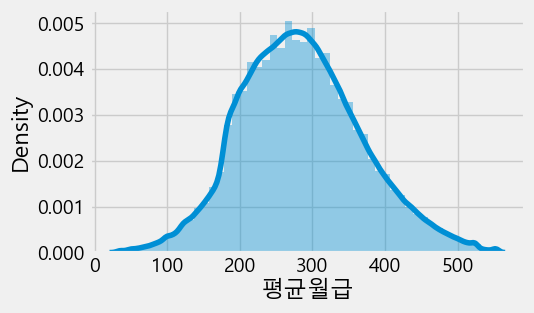

In [34]:
plt.figure(figsize=(5, 3))
sns.distplot(df.loc[df['평균월급'].notnull(), '평균월급'])
plt.show()

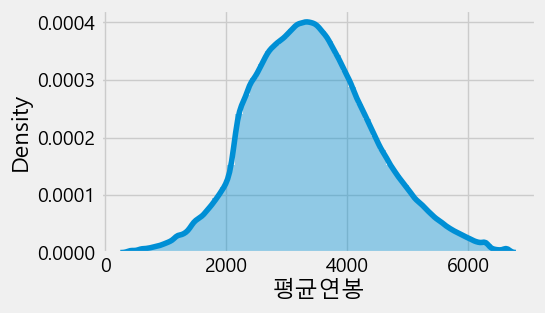

In [35]:
plt.figure(figsize=(5, 3))
sns.distplot(df.loc[df['평균연봉'].notnull(), '평균연봉'])
plt.show()

## validation

In [258]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [259]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

In [260]:
test = df
test.shape

(3545860, 13)

In [261]:
test.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,450530.75,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,450617.10,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,450401.02,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,450295.95,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,449983.90,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [262]:
X = test.drop(labels=['사업장명','도로명주소','업종코드명','고지금액','신규','상실','인당고지금액','평균월급'], axis = 1)
y = test.drop(labels=['사업장명','도로명주소','업종코드명','가입자수','고지금액','인당고지금액','평균월급','평균연봉'], axis = 1)

In [263]:
X.head()

,자료생성년월,사업자번호,가입자수,평균연봉,key
0,1,211814,597,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,211814,593,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,211814,590,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,211814,588,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,211814,584,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [264]:
y.head()

,자료생성년월,사업자번호,신규,상실,key
0,1,211814,1,6,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,211814,2,8,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,211814,5,7,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,211814,5,6,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,211814,2,4,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [265]:
a = X.loc[X['자료생성년월'] <= 8]
a.head()

,자료생성년월,사업자번호,가입자수,평균연봉,key
0,1,211814,597,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,211814,593,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,211814,590,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,211814,588,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,211814,584,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [266]:
b = y.loc[y['자료생성년월'] <= 8]
b.head()

,자료생성년월,사업자번호,신규,상실,key
0,1,211814,1,6,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,211814,2,8,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,211814,5,7,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,211814,5,6,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,211814,2,4,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [267]:
c = X.loc[X['자료생성년월'] == 9]
c.head()

,자료생성년월,사업자번호,가입자수,평균연봉,key
8,9,211814,580,6376,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
18,9,201810,19,4423,신일기업(주) 201810 서울특별시 중구 퇴계로 기타
28,9,104810,312,5354,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업
38,9,102812,853,6232,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업
48,9,202814,42,4909,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업


In [268]:
d = y.loc[y['자료생성년월'] == 9]
d.head()

,자료생성년월,사업자번호,신규,상실,key
8,9,211814,2,2,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
18,9,201810,0,0,신일기업(주) 201810 서울특별시 중구 퇴계로 기타
28,9,104810,6,0,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업
38,9,102812,8,8,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업
48,9,202814,1,2,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업


In [367]:
X_train = a #1~8월
y_train = b #1~8월 입사자, 퇴사자 수
X_valid = c #9월 
y_valid = d #9월 입사자, 퇴사자 수

In [368]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_bc = BaggingClassifier()
model_ada = AdaBoostClassifier()

In [369]:
# 가입자수와 평균연봉에 따른 신규, 상실자 수 예측
X_train['가입자수'] = X_train['가입자수'].astype('uint32')
X_train['평균연봉'] = X_train['평균연봉'].astype('uint32')
y_train['신규'] = y_train['신규'].astype('uint16')
y_train['상실'] = y_train['상실'].astype('uint16')
X_valid['가입자수'] = X_valid['가입자수'].astype('uint32')
X_valid['평균연봉'] = X_valid['평균연봉'].astype('uint32')
y_valid['신규'] = y_valid['신규'].astype('uint16')
y_valid['상실'] = y_valid['상실'].astype('uint16')

In [370]:
for column in y_train.columns:
    print(column, y_train[column].min(),y_train[column].max())

자료생성년월 1 8
사업자번호 101800 910840
신규 0 2083
상실 0 1922
key    (One+)용인동천노인복지센터 142826 경기도 용인시 수지구 동천로 기타 ６형제바둑（주） 132815 경기도 남양주시 진접읍 진벌로51번길 인형 및 장난감 제조업


In [371]:
X_train = X_train[{'가입자수','평균연봉'}]
X_valid = X_valid[{'가입자수','평균연봉'}]

In [372]:
X_train.shape

(2836688, 2)

In [373]:
y_train.shape

(2836688, 5)

In [276]:
%%timeit
model_dt.fit(X_train,y_train.신규)

17 s ± 642 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [277]:
pred = model_dt.predict(X_valid)

In [278]:
pred

array([ 1,  0,  9, ..., 10,  0,  0], dtype=uint16)

In [279]:
id_1 = c.사업자번호

In [280]:
result = pd.DataFrame(id_1)
result['신규'] = pred

In [281]:
#9월 신입 validation
result

,사업자번호,신규
8,211814,1
18,201810,0
28,104810,9
38,102812,8
48,202814,0
...,...,...
3545818,224813,0
3545828,120810,0
3545838,130810,10
3545848,217811,0


In [375]:
accuracy_score(y_valid.신규,pred)

0.7362163198772653

In [376]:
from sklearn.metrics import classification_report

In [380]:
print(classification_report(y_valid.신규,pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87    265524
           1       0.25      0.07      0.11     50803
           2       0.15      0.05      0.08     16989
           3       0.11      0.05      0.06      7432
           4       0.09      0.04      0.05      4055
           5       0.06      0.03      0.04      2363
           6       0.04      0.02      0.03      1576
           7       0.05      0.04      0.04      1040
           8       0.05      0.04      0.04       704
           9       0.03      0.03      0.03       537
          10       0.03      0.02      0.02       417
          11       0.03      0.03      0.03       377
          12       0.01      0.01      0.01       277
          13       0.02      0.02      0.02       234
          14       0.01      0.01      0.01       207
          15       0.02      0.02      0.02       154
          16       0.01      0.01      0.01       153
          17       0.02    

In [385]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid.상실,pred,pos_label=1)
print(fpr, tpr, thresholds)

[0.00000000e+00 3.34253645e-06 1.00276094e-05 1.67126823e-05
 5.34805832e-05 6.01656561e-05 7.01932655e-05 7.68783384e-05
 1.20331312e-04 1.27016385e-04 1.73811895e-04 1.80496968e-04
 1.93867114e-04 2.07237260e-04 2.13922333e-04 2.27292479e-04
 2.44005161e-04 2.50690234e-04 2.60717843e-04 2.67402916e-04
 2.74087989e-04 2.74087989e-04 3.10855890e-04 3.20883499e-04
 3.27568572e-04 3.30911109e-04 3.37596181e-04 3.50966327e-04
 3.57651400e-04 3.60993937e-04 3.71021546e-04 3.77706619e-04
 3.87734228e-04 3.94419301e-04 4.01104374e-04 4.04446910e-04
 4.14474520e-04 4.17817056e-04 4.24502129e-04 4.34529739e-04
 4.41214811e-04 4.47899884e-04 4.61270030e-04 4.67955103e-04
 4.74640176e-04 4.81325249e-04 4.91352858e-04 4.98037931e-04
 5.14750613e-04 5.34805832e-04 5.44833441e-04 5.58203587e-04
 5.74916269e-04 5.88286415e-04 6.04999098e-04 6.11684170e-04
 6.31739389e-04 6.48452071e-04 6.55137144e-04 6.95247582e-04
 7.15302800e-04 7.35358019e-04 7.45385628e-04 7.58755774e-04
 8.25606503e-04 8.456617

In [386]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5239793484721195

In [300]:
%%timeit
model_dt.fit(X_train,y_train.상실)

16.5 s ± 433 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [301]:
pred2 = model_dt.predict(X_valid)

In [302]:
pred2

array([ 1,  0,  0, ..., 21,  0,  0], dtype=uint16)

In [303]:
result['상실'] = pred2

In [304]:
#9월 상실 validation
result

,사업자번호,신규,상실
8,211814,1,1
18,201810,0,0
28,104810,9,0
38,102812,8,10
48,202814,0,0
...,...,...,...
3545818,224813,0,0
3545828,120810,0,0
3545838,130810,10,21
3545848,217811,0,0


In [378]:
accuracy_score(y_valid.상실,pred2)

0.7388419170525627

In [379]:
classification_report(y_valid.상실,pred2,output_dict=True)

{'0': {'precision': 0.7932344786612536,
  'recall': 0.965623752231857,
  'f1-score': 0.8709810037340183,
  'support': 265474},
 '1': {'precision': 0.26599918820186713,
  'recall': 0.07095935898361366,
  'f1-score': 0.11203236743881242,
  'support': 55412},
 '2': {'precision': 0.15576991782779565,
  'recall': 0.05457845653126369,
  'f1-score': 0.0808342989571263,
  'support': 15977},
 '3': {'precision': 0.11819699499165276,
  'recall': 0.054236249425463456,
  'f1-score': 0.07435412728418399,
  'support': 6527},
 '4': {'precision': 0.09025866813428729,
  'recall': 0.05032218471923903,
  'f1-score': 0.06461780929866036,
  'support': 3259},
 '5': {'precision': 0.07937806873977087,
  'recall': 0.04954034729315628,
  'f1-score': 0.06100628930817611,
  'support': 1958},
 '6': {'precision': 0.07547169811320754,
  'recall': 0.05647840531561462,
  'f1-score': 0.06460807600950119,
  'support': 1204},
 '7': {'precision': 0.060882800608828,
  'recall': 0.04711425206124853,
  'f1-score': 0.053120849

In [383]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid.상실,pred2,pos_label=1)
print(fpr, tpr, thresholds)

[0.00000000e+00 3.34253645e-06 2.67402916e-05 4.01104374e-05
 1.03618630e-04 1.10303703e-04 1.16988776e-04 1.23673849e-04
 1.27016385e-04 1.33701458e-04 1.43729067e-04 1.50414140e-04
 1.57099213e-04 1.60441750e-04 1.70469359e-04 1.93867114e-04
 2.00552187e-04 2.23949942e-04 2.37320088e-04 2.50690234e-04
 2.57375307e-04 2.67402916e-04 2.77430525e-04 2.87458135e-04
 2.94143208e-04 3.00828281e-04 3.07513353e-04 3.17540963e-04
 3.34253645e-04 3.44281254e-04 3.47623791e-04 3.57651400e-04
 3.64336473e-04 3.74364082e-04 3.77706619e-04 3.87734228e-04
 4.01104374e-04 4.04446910e-04 4.17817056e-04 4.24502129e-04
 4.54584957e-04 4.57927494e-04 4.81325249e-04 4.84667785e-04
 4.98037931e-04 5.18093150e-04 5.34805832e-04 5.48175978e-04
 5.61546124e-04 5.71573733e-04 5.84943879e-04 6.04999098e-04
 6.18369243e-04 6.28396853e-04 6.31739389e-04 6.38424462e-04
 6.55137144e-04 6.58479681e-04 6.81877436e-04 6.95247582e-04
 7.05275191e-04 7.18645337e-04 7.35358019e-04 7.42043092e-04
 7.52070701e-04 7.654408

In [384]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5223785731897428

## test

In [328]:
q = X.loc[X['자료생성년월'] != 10]
q.head()

,자료생성년월,사업자번호,가입자수,평균연봉,key
0,1,211814,597,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,211814,593,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,211814,590,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,211814,588,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,211814,584,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [329]:
w = y.loc[y['자료생성년월'] != 10]
w.head()

,자료생성년월,사업자번호,신규,상실,key
0,1,211814,1,6,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,211814,2,8,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,211814,5,7,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,211814,5,6,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,211814,2,4,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [330]:
e = X.loc[X['자료생성년월'] == 10]
e.head()

,자료생성년월,사업자번호,가입자수,평균연봉,key
9,10,211814,585,6375,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
19,10,201810,19,4505,신일기업(주) 201810 서울특별시 중구 퇴계로 기타
29,10,104810,314,5334,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업
39,10,102812,846,6233,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업
49,10,202814,40,4898,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업


In [331]:
r = y.loc[y['자료생성년월'] == 10]
r.head()

,자료생성년월,사업자번호,신규,상실,key
9,10,211814,7,2,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
19,10,201810,0,0,신일기업(주) 201810 서울특별시 중구 퇴계로 기타
29,10,104810,2,5,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업
39,10,102812,1,6,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업
49,10,202814,0,1,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업


In [387]:
X_train = q
y_train = w
X_test = e
y_test = r

In [388]:
# 가입자수와 평균연봉에 따른 신규, 상실자 수 예측
X_train['가입자수'] = X_train['가입자수'].astype('uint32')
X_train['평균연봉'] = X_train['평균연봉'].astype('uint32')
y_train['신규'] = y_train['신규'].astype('uint16')
y_train['상실'] = y_train['상실'].astype('uint16')
X_test['가입자수'] = X_test['가입자수'].astype('uint32')
X_test['평균연봉'] = X_test['평균연봉'].astype('uint32')
y_test['신규'] = y_test['신규'].astype('uint16')
y_test['상실'] = y_test['상실'].astype('uint16')

In [389]:
X_train = X_train[{'가입자수','평균연봉'}]
X_test = X_test[{'가입자수','평균연봉'}]

In [390]:
X_train.shape

(3191274, 2)

In [391]:
y_train.shape

(3191274, 5)

In [337]:
%%timeit
model_dt.fit(X_train,y_train.신규)

19.3 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [338]:
pred3 = model_dt.predict(X_test)

In [339]:
pred3

array([0, 1, 0, ..., 4, 0, 0], dtype=uint16)

In [340]:
id_2 = e.사업자번호

In [341]:
result2 = pd.DataFrame(id_2)

In [342]:
result2['11월 입사자 수'] = pred3
result2 = result2.drop(columns = '사업자번호')

In [343]:
result2

,11월 입사자 수
9,0
19,1
29,0
39,8
49,1
...,...
3545819,0
3545829,1
3545839,4
3545849,0


In [344]:
accuracy_score(y_test.신규,pred3)

0.7577174507735782

In [366]:
classification_report(y_test.신규,pred3,output_dict=True)

{'0': {'precision': 0.8183777271287596,
  'recall': 0.9594664453230234,
  'f1-score': 0.8833237253824187,
  'support': 274686},
 '1': {'precision': 0.2505448106782893,
  'recall': 0.07603281873230414,
  'f1-score': 0.11666217437491083,
  'support': 48387},
 '2': {'precision': 0.14290869722121977,
  'recall': 0.05430608886450905,
  'f1-score': 0.07870416376825996,
  'support': 14584},
 '3': {'precision': 0.0959349593495935,
  'recall': 0.04891394461946609,
  'f1-score': 0.06479244454206018,
  'support': 6031},
 '4': {'precision': 0.05930359085963003,
  'recall': 0.03638184245660881,
  'f1-score': 0.045097227968556065,
  'support': 2996},
 '5': {'precision': 0.0554290053151101,
  'recall': 0.03991252050300711,
  'f1-score': 0.04640813731722823,
  'support': 1829},
 '6': {'precision': 0.0416221985058698,
  'recall': 0.03277310924369748,
  'f1-score': 0.03667136812411848,
  'support': 1190},
 '7': {'precision': 0.04888268156424581,
  'recall': 0.044472681067344345,
  'f1-score': 0.04657351

In [392]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test.신규,pred3,pos_label=1)
print(fpr, tpr, thresholds)

[0.00000000e+00 3.26584999e-06 6.53169997e-06 1.30633999e-05
 5.87852998e-05 6.53169997e-05 1.11038900e-04 1.17570600e-04
 1.30633999e-04 1.37165699e-04 1.50229099e-04 1.56760799e-04
 1.86153449e-04 1.92685149e-04 2.28609499e-04 2.35141199e-04
 2.41672899e-04 2.48204599e-04 2.51470449e-04 2.61267999e-04
 2.67799699e-04 2.80863099e-04 2.93926499e-04 3.06989899e-04
 3.20053299e-04 3.29850849e-04 3.36382549e-04 3.55977649e-04
 3.69041048e-04 3.72306898e-04 3.78838598e-04 3.82104448e-04
 3.91901998e-04 3.95167848e-04 4.04965398e-04 4.08231248e-04
 4.21294648e-04 4.31092198e-04 4.34358048e-04 4.47421448e-04
 4.57218998e-04 4.73548248e-04 4.86611648e-04 4.93143348e-04
 4.99675048e-04 5.02940898e-04 5.09472598e-04 5.19270148e-04
 5.29067698e-04 5.32333548e-04 5.38865248e-04 5.48662798e-04
 5.55194498e-04 5.61726198e-04 5.68257898e-04 5.87852998e-04
 5.97650548e-04 6.13979797e-04 6.20511497e-04 6.30309047e-04
 6.33574897e-04 6.43372447e-04 6.49904147e-04 6.62967547e-04
 6.72765097e-04 6.858284

In [393]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5339349472446366

In [346]:
%%timeit
model_dt.fit(X_train,y_train.상실)

19.2 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [347]:
pred4 = model_dt.predict(X_test)

In [348]:
pred4

array([3, 0, 5, ..., 2, 0, 0], dtype=uint16)

In [349]:
result2['11월 퇴사자 수'] = pred4

In [350]:
result2

,11월 입사자 수,11월 퇴사자 수
9,0,3
19,1,0
29,0,5
39,8,7
49,1,0
...,...,...
3545819,0,0
3545829,1,0
3545839,4,2
3545849,0,0


In [351]:
accuracy_score(y_test.상실,pred4)

0.7322398515451822

In [354]:
classification_report(y_test.상실,pred4,output_dict=True)

{'0': {'precision': 0.7831989255592452,
  'recall': 0.9673741001719756,
  'f1-score': 0.8655981152823501,
  'support': 262828},
 '1': {'precision': 0.26990797768277663,
  'recall': 0.06497470783185069,
  'f1-score': 0.1047363315572676,
  'support': 57330},
 '2': {'precision': 0.1723942598187311,
  'recall': 0.05526299860783246,
  'f1-score': 0.08369620021084476,
  'support': 16521},
 '3': {'precision': 0.11316941731222634,
  'recall': 0.05022421524663677,
  'f1-score': 0.06957241950512474,
  'support': 6690},
 '4': {'precision': 0.09261363636363637,
  'recall': 0.04669149240905185,
  'f1-score': 0.06208341268329843,
  'support': 3491},
 '5': {'precision': 0.07692307692307693,
  'recall': 0.04705274043433299,
  'f1-score': 0.05838947706127687,
  'support': 1934},
 '6': {'precision': 0.06363636363636363,
  'recall': 0.04786324786324787,
  'f1-score': 0.05463414634146342,
  'support': 1170},
 '7': {'precision': 0.044072948328267476,
  'recall': 0.03295454545454545,
  'f1-score': 0.0377113

In [394]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test.상실,pred4,pos_label=1)
print(fpr, tpr, thresholds)

[0.00000000e+00 3.36410367e-06 1.68205183e-05 2.69128293e-05
 1.51384665e-04 1.58112872e-04 1.74933391e-04 1.81661598e-04
 2.28759049e-04 2.35487257e-04 2.52307775e-04 2.52307775e-04
 2.59035982e-04 2.75856501e-04 2.82584708e-04 2.89312915e-04
 2.99405226e-04 3.02769330e-04 3.09497537e-04 3.19589848e-04
 3.26318056e-04 3.33046263e-04 3.46502678e-04 3.53230885e-04
 3.66687300e-04 3.76779611e-04 3.83507818e-04 3.96964233e-04
 4.03692440e-04 4.20512959e-04 4.27241166e-04 4.40697581e-04
 4.47425788e-04 4.50789892e-04 4.60882203e-04 4.64246306e-04
 4.91159136e-04 5.01251447e-04 5.28164276e-04 5.58441209e-04
 5.68533520e-04 5.78625831e-04 5.98810453e-04 6.05538660e-04
 6.08902764e-04 6.15630971e-04 6.32451490e-04 6.52636112e-04
 6.69456630e-04 6.82913045e-04 7.06461770e-04 7.13189978e-04
 7.40102807e-04 8.00656673e-04 8.20841295e-04 8.30933606e-04
 8.34297710e-04 8.47754124e-04 8.84759265e-04 9.52041338e-04
 9.82318271e-04 1.01932341e-03 1.02268752e-03 1.05296445e-03
 1.09333369e-03 1.147159

In [395]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5190931944665138

## 고유 key 생성

In [88]:
temp_data = df

In [89]:
cols = ['사업장명', '사업자번호', '도로명주소','업종코드명']
temp_data['key'] = temp_data[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
temp_data.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,450530.75,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,450617.10,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,450401.02,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,450295.95,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,449983.90,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [90]:
temp_data = temp_data.loc[temp_data['자료생성년월'] == 10]
temp_data = temp_data[{'사업장명','사업자번호','업종코드명','도로명주소','key'}]
temp_data.head()

,사업자번호,업종코드명,key,사업장명,도로명주소
9,211814,포장용 플라스틱 성형용기 제조업,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...,(주)니프코코리아,충청남도 아산시 둔포면 아산밸리남로
19,201810,기타,신일기업(주) 201810 서울특별시 중구 퇴계로 기타,신일기업(주),서울특별시 중구 퇴계로
29,104810,잡지 및 정기 간행물 발행업,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업,(주)헤럴드,서울특별시 용산구 후암로4길
39,102812,잡지 및 정기 간행물 발행업,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업,연합뉴스(주),서울특별시 종로구 율곡로2길
49,202814,내륙 수상 여객 및 화물 운송업,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업,협성해운(주),서울특별시 중구 을지로


In [123]:
final_data = pd.concat([temp_data,result2],axis=1)
final_data = final_data[['사업장명','사업자번호','도로명주소','업종코드명','11월 입사자 수','11월 퇴사자 수','key']]
final_data.reset_index(inplace = True)
final_data = final_data.drop(columns = ['index'])
final_data.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,신일기업(주) 201810 서울특별시 중구 퇴계로 기타
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,(주)헤럴드 104810 서울특별시 용산구 후암로4길 잡지 및 정기 간행물 발행업
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,연합뉴스(주) 102812 서울특별시 종로구 율곡로2길 잡지 및 정기 간행물 발행업
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,협성해운(주) 202814 서울특별시 중구 을지로 내륙 수상 여객 및 화물 운송업


In [92]:
alldata = df.drop(columns = ['고지금액','인당고지금액'])
alldata.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [93]:
cols = ['사업장명', '사업자번호', '도로명주소','업종코드명']
alldata['key'] = alldata[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
alldata.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [94]:
alldata['key'].value_counts()

(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 성형용기 제조업    10
농업회사법인주식회사에이원컴퍼니 421810 강원도 원주시 문막읍 문막공단길 상품 종합 도매업       10
대성재가장애인복지센터 126822 부산광역시 해운대구 선수촌로 BIZ_NO미존재사업장           10
(주)더비엔 407860 서울특별시 마포구 마포대로 데이터베이스 및 온라인 정보 제공업          10
주식회사에이스테크 153810 충청남도 서산시 지곡면 충의로 포장용 플라스틱 성형용기 제조업       10
                                                          ..
용해신용협동조합 411820 전라남도 목포시 연산백련로1번길 신용조합                    10
오륜기업(주) 417810 전라남도 여수시 대통2길 기타                           10
주식회사 포에이스 416810 전라남도 광양시 길호1길 그 외 기타 1차 철강 제조업           10
(주)남광포리마 416810 경상북도 포항시 남구 철강로 산업용 그 외 비경화 고무제품 제조업      10
예천군가족센터 512820 경상북도 예천군 예천읍 충효로 BIZ_NO미존재사업장              10
Name: key, Length: 354586, dtype: int64

## 고유 key값 인코딩

In [95]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [96]:
encoding_columns = ['key']

In [124]:
final_data['key'] = final_data[encoding_columns].apply(encoding_label)

In [125]:
final_data.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,331993


In [99]:
alldata['key'] = alldata[encoding_columns].apply(encoding_label)

In [100]:
alldata.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,14336


key값 입력:  14336


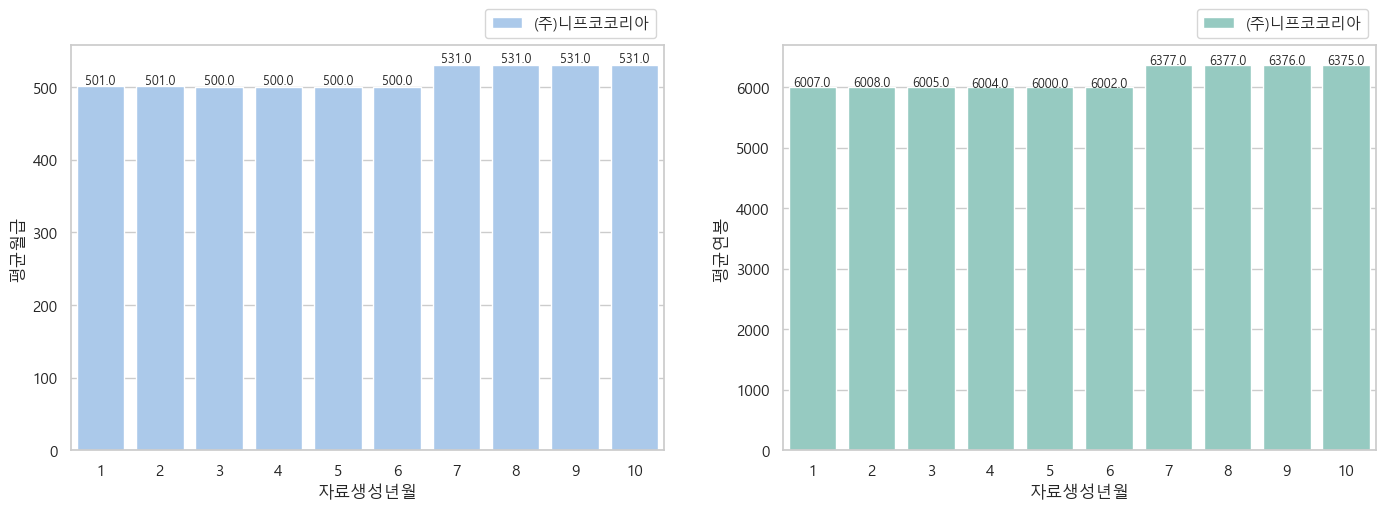

In [101]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

fig = plt.figure(figsize=(15, 5))

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

a = int(input("key값 입력: "))
ax1 = sns.barplot(x = alldata.loc[alldata['key'] == a]["자료생성년월"], y = alldata.loc[alldata['key'] == a]["평균월급"], 
            hue = alldata.loc[alldata['key'] == a]['사업장명'], palette='pastel', ax=area01)

ax2 = sns.barplot(x = alldata.loc[alldata['key'] == a]["자료생성년월"], y = alldata.loc[alldata['key'] == a]["평균연봉"], 
            hue = alldata.loc[alldata['key'] == a]['사업장명'], palette='Set3', ax=area02)

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

ax1.legend(loc = 4, bbox_to_anchor = (1,1))
ax2.legend(loc = 4, bbox_to_anchor = (1,1))
plt.show()

## MoM 계산

In [104]:
mom = df.drop(columns = ['인당고지금액'])
mom.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,501,6007,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,501,6008,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,500,6005,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,500,6004,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,500,6000,(주)니프코코리아 211814 충청남도 아산시 둔포면 아산밸리남로 포장용 플라스틱 ...


In [105]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [106]:
encoding_columns = ['key']

In [107]:
mom['key'] = alldata[encoding_columns].apply(encoding_label)
mom.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,평균월급,평균연봉,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,501,6007,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,501,6008,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,500,6005,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,500,6004,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,500,6000,14336


In [108]:
mom['MOM'] = mom.groupby(['key']).고지금액.pct_change() *100
mom

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,고지금액,신규,상실,평균월급,평균연봉,key,MOM
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,268966860,1,6,501,6007,14336,NaN
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,267215940,2,8,501,6008,14336,-0.65
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,265736600,5,7,500,6005,14336,-0.55
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,264774020,5,6,500,6004,14336,-0.36
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,262790600,2,4,500,6000,14336,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545855,6,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2705980,0,0,188,2255,178336,0.00
3545856,7,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2865740,0,0,199,2388,178336,5.90
3545857,8,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2865740,0,0,199,2388,178336,0.00
3545858,9,예천군가족센터,512820,경상북도 예천군 예천읍 충효로,BIZ_NO미존재사업장,16,2865740,0,1,199,2388,178336,0.00


In [109]:
mom = mom.fillna(0)
mom = mom[['자료생성년월','사업장명', '사업자번호', '도로명주소', '업종코드명', '가입자수', '신규', '상실', '고지금액', '평균월급', '평균연봉', 'MOM', 'key']]
mom.loc[3545850, '자료생성년월'] = 1
mom.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,고지금액,평균월급,평균연봉,MOM,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,268966860,501,6007,0.00,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,267215940,501,6008,-0.65,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,265736600,500,6005,-0.55,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,264774020,500,6004,-0.36,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,262790600,500,6000,-0.75,14336


In [110]:
MoM = mom.drop(columns = ['고지금액'])
MoM.head()

,자료생성년월,사업장명,사업자번호,도로명주소,업종코드명,가입자수,신규,상실,평균월급,평균연봉,MOM,key
0,1,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,597,1,6,501,6007,0.00,14336
1,2,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,593,2,8,501,6008,-0.65,14336
2,3,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,590,5,7,500,6005,-0.55,14336
3,4,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,588,5,6,500,6004,-0.36,14336
4,5,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,584,2,4,500,6000,-0.75,14336


key값 입력:  14336


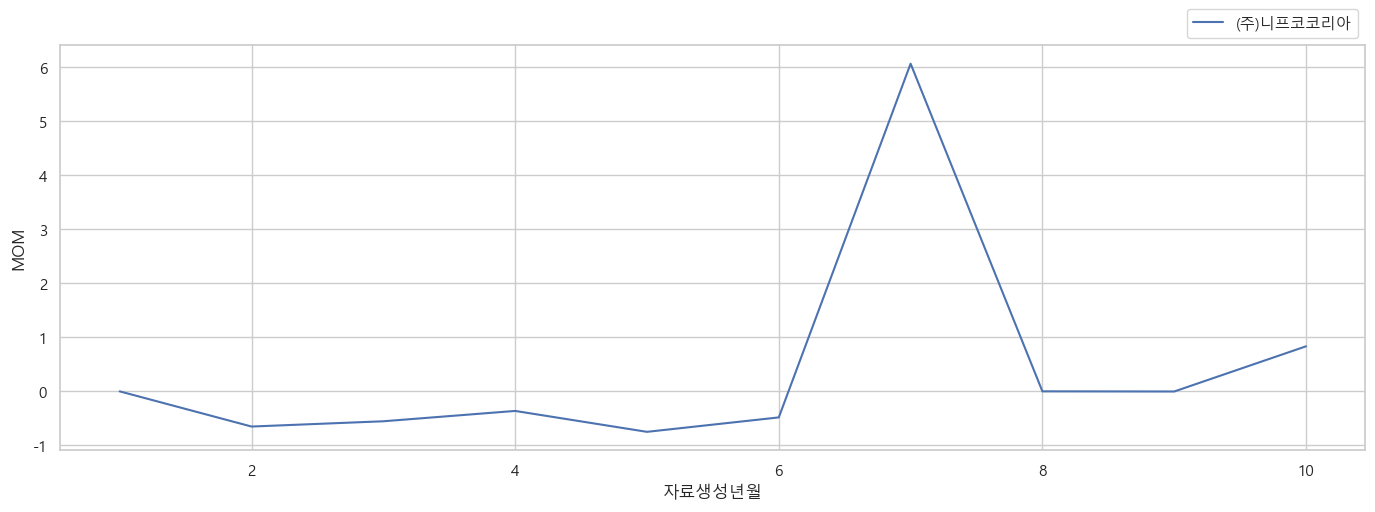

In [111]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

sfig = plt.figure(figsize=(15, 5))

a = int(input("key값 입력: "))
ax3 = sns.lineplot(x = mom.loc[mom['key'] == a]["자료생성년월"], y = mom.loc[mom['key'] == a]["MOM"],hue = mom.loc[mom['key'] == a]['사업장명'])
ax3.legend(loc = 4, bbox_to_anchor = (1,1))

sfig =ax3.get_figure()

#1, 2, 3, 4, 5, 6, 7, 8, 9, 10]x = [
#plt.xticks(x)
# sfig.savefig('filename.png',  orientation="landscape")

## CMGR 계산

In [112]:
cmgr = final_data
cmgr.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,331993


In [113]:
ten = mom.loc[mom["자료생성년월"] == 10].고지금액.to_frame()
ten.reset_index(inplace=True)
ten = ten.drop(columns = ['index'])
ten.head()

,고지금액
0,279683880
1,6419460
2,125617700
3,395481180
4,14695260


In [114]:
one = mom.loc[mom["자료생성년월"] == 1].고지금액.to_frame()
one.reset_index(inplace=True)
one = one.drop(columns = ['index'])
one.head()

,고지금액
0,268966860
1,5879100
2,119581820
3,382843900
4,15691660


In [115]:
cmgr['1월 고지금액'] = one.고지금액
cmgr['10월 고지금액'] = ten.고지금액
cmgr.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,key,1월 고지금액,10월 고지금액
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,14336,268966860,279683880
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,163761,5879100,6419460
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,84481,119581820,125617700
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,175922,382843900,395481180
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,331993,15691660,14695260


In [116]:
cmgr['CMGR'] = (pow((cmgr['10월 고지금액'] / cmgr['1월 고지금액']), 1/9) - 1) * 100
cmgr = cmgr.drop(columns = ['1월 고지금액','10월 고지금액'])
cmgr=cmgr[['사업장명', '사업자번호', '도로명주소', '업종코드명', '11월 입사자 수', 
           '11월 퇴사자 수', 'CMGR', 'key']]
cmgr.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.44,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993


In [117]:
a = int(input("key값 입력: "))
cmgr.loc[cmgr['key'] == a]

key값 입력:  14336


,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.44,14336


## 테스트

In [154]:
momavg = MoM.groupby(['key']).mean()
momavg = momavg.drop(columns = ['자료생성년월','사업자번호','가입자수','신규','상실','평균월급','평균연봉'])
momavg.head()

,MOM
key,
0,0.42
1,-1.52
2,4.98
3,1.62
4,-0.24


In [205]:
fin = pd.merge(cmgr, momavg, how = "inner", on = ['key'])
fin.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key,MOM
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.44,14336,0.41
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761,0.89
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481,0.52
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922,0.35
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993,-0.63


In [206]:
# MOM 평균 분위수
print(np.percentile(fin['MOM'], 10))
print(np.percentile(fin['MOM'], 20))
print(np.percentile(fin['MOM'], 30))
print(np.percentile(fin['MOM'], 40))
print(np.percentile(fin['MOM'], 50))
print(np.percentile(fin['MOM'], 60))
print(np.percentile(fin['MOM'], 70))
print(np.percentile(fin['MOM'], 80))
print(np.percentile(fin['MOM'], 90))
print(np.percentile(fin['MOM'], 100))

-1.8502028375860538
-0.7454411698215981
-0.09646964788323176
0.2440965095840597
0.57087702641477
0.9846829784195688
1.5664384897053858
2.444304642202515
4.059500366977291
330.18580813112715


In [207]:
standard = []
for row in fin['MOM']:
    if row <= -1.8502028375860538:
        standard.append(1)
    elif -1.8502028375860538 < row and row <= -0.7454411698215981:
        standard.append(2)
    elif -0.7454411698215981 < row and row <= -0.09646964788323176:
        standard.append(3)
    elif -0.09646964788323176 < row and row <= 0.2440965095840597:
        standard.append(4)
    elif 0.2440965095840597 < row and row <= 0.57087702641477:
        standard.append(5)
    elif 0.57087702641477 < row and row <= 0.9846829784195688:
        standard.append(6)
    elif 0.9846829784195688 < row and row <= 1.5664384897053858:
        standard.append(7)
    elif 1.5664384897053858 < row and row <= 2.444304642202515:
        standard.append(8)
    elif 2.444304642202515 < row and row <= 4.059500366977291:
        standard.append(9)
    else:
        standard.append(10)
        
fin['standard1'] = standard
fin.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key,MOM,standard1
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.44,14336,0.41,5
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761,0.89,6
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481,0.52,5
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922,0.35,5
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993,-0.63,3


In [208]:
# CMGR 분위수
print(np.percentile(fin['CMGR'], 10))
print(np.percentile(fin['CMGR'], 20))
print(np.percentile(fin['CMGR'], 30))
print(np.percentile(fin['CMGR'], 40))
print(np.percentile(fin['CMGR'], 50))
print(np.percentile(fin['CMGR'], 60))
print(np.percentile(fin['CMGR'], 70))
print(np.percentile(fin['CMGR'], 80))
print(np.percentile(fin['CMGR'], 90))
print(np.percentile(fin['CMGR'], 100))

-2.558352762485888
-1.1620632861601865
-0.3226251798176094
0.11105222506004875
0.4473872392599776
0.8393285801042705
1.4051632774207623
2.2386692611048753
3.6901460828269728
58.456653086089425


In [209]:
standard = []
for row in fin['CMGR']:
    if row <= -2.558352762485888:
        standard.append(1)
    elif -2.558352762485888 < row and row <= -1.1620632861601865:
        standard.append(2)
    elif -1.1620632861601865 < row and row <= -0.3226251798176094:
        standard.append(3)
    elif -0.3226251798176094 < row and row <= 0.11105222506004875:
        standard.append(4)
    elif 0.11105222506004875 < row and row <= 0.4473872392599776:
        standard.append(5)
    elif 0.4473872392599776 < row and row <= 0.8393285801042705:
        standard.append(6)
    elif 0.8393285801042705 < row and row <= 1.4051632774207623:
        standard.append(7)
    elif 1.4051632774207623 < row and row <= 2.2386692611048753:
        standard.append(8)
    elif 2.2386692611048753 < row and row <= 3.6901460828269728:
        standard.append(9)
    else:
        standard.append(10)
        
fin['standard2'] = standard
fin.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key,MOM,standard1,standard2
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.44,14336,0.41,5,5
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761,0.89,6,7
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481,0.52,5,6
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922,0.35,5,5
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993,-0.63,3,3


In [210]:
fin['standard'] = fin['standard1']+fin['standard2']
fin.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key,MOM,standard1,standard2,standard
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.44,14336,0.41,5,5,10
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761,0.89,6,7,13
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481,0.52,5,6,11
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922,0.35,5,5,10
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993,-0.63,3,3,6


In [211]:
# standard 분위수
print(np.percentile(fin['standard'], 10))
print(np.percentile(fin['standard'], 20))
print(np.percentile(fin['standard'], 30))
print(np.percentile(fin['standard'], 40))
print(np.percentile(fin['standard'], 50))
print(np.percentile(fin['standard'], 60))
print(np.percentile(fin['standard'], 70))
print(np.percentile(fin['standard'], 80))
print(np.percentile(fin['standard'], 90))
print(np.percentile(fin['standard'], 100))

3.0
5.0
7.0
9.0
11.0
13.0
15.0
17.0
19.0
20.0


In [212]:
standard = []
for row in fin['standard']:
    if row <= 3.0:
        standard.append('D')
    elif 3.0 < row and row <= 5.0:
        standard.append('C')
    elif 5.0 < row and row <= 7.0:
        standard.append('CC')
    elif 7.0 < row and row <= 9.0:
        standard.append('CCC')
    elif 9.0 < row and row <= 11.0:
        standard.append('B')
    elif 11.0 < row and row <= 13.0:
        standard.append('BB')
    elif 13.0 < row and row <= 15.0:
        standard.append('BBB')
    elif 15.0 < row and row <= 17.0:
        standard.append('A')
    elif 17.0 < row and row <= 19.0:
        standard.append('AA')
    else:
        standard.append('AAA')
        
fin['등급'] = standard
fin.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,CMGR,key,MOM,standard1,standard2,standard,등급
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.44,14336,0.41,5,5,10,B
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.98,163761,0.89,6,7,13,BB
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.55,84481,0.52,5,6,11,B
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.36,175922,0.35,5,5,10,B
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.73,331993,-0.63,3,3,6,CC


In [213]:
fin = fin.drop(columns = ['standard1','standard2','standard'])
fin = fin.rename(columns={'CMGR':'월간복합성장률', 'MOM':'평균월별성장률'})
fin = fin[['사업장명','사업자번호','도로명주소','업종코드명','11월 입사자 수','11월 퇴사자 수','평균월별성장률','월간복합성장률','등급','key']]
fin.head()

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,평균월별성장률,월간복합성장률,등급,key
0,(주)니프코코리아,211814,충청남도 아산시 둔포면 아산밸리남로,포장용 플라스틱 성형용기 제조업,11,1,0.41,0.44,B,14336
1,신일기업(주),201810,서울특별시 중구 퇴계로,기타,1,0,0.89,0.98,BB,163761
2,(주)헤럴드,104810,서울특별시 용산구 후암로4길,잡지 및 정기 간행물 발행업,0,5,0.52,0.55,B,84481
3,연합뉴스(주),102812,서울특별시 종로구 율곡로2길,잡지 및 정기 간행물 발행업,8,7,0.35,0.36,B,175922
4,협성해운(주),202814,서울특별시 중구 을지로,내륙 수상 여객 및 화물 운송업,1,0,-0.63,-0.73,CC,331993


In [214]:
fin['등급'].value_counts()

D      37999
B      37598
CCC    37485
C      36382
CC     35773
BB     35567
A      34395
BBB    34387
AA     33937
AAA    31063
Name: 등급, dtype: int64

In [215]:
import openpyxl

In [216]:
final_data.drop(columns = ['사업자번호','11월 입사자 수','11월 퇴사자 수']).to_csv("data.csv",encoding='euc-kr')
MoM.to_csv("alldata.csv",encoding='euc-kr')
fin.to_csv("cmgr.csv",encoding='euc-kr')

In [257]:
fin.loc[fin['사업장명'] == '(주)이노버전스']

# 기업 자체의 등급이 아닌 평균월별성장률과 월간복합성장률 데이터를 활용하여 기업성장지표 등급을 매긴 것

,사업장명,사업자번호,도로명주소,업종코드명,11월 입사자 수,11월 퇴사자 수,평균월별성장률,월간복합성장률,등급,key
236659,(주)이노버전스,141814,세종특별자치시 시청대로,응용 소프트웨어 개발 및 공급업,0,0,-3.06,-3.74,D,60387
